In [53]:
import numpy as np
import pandas as pd
import torch

In [54]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [55]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')


In [56]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2297,ham,Draw va?i dont think so:),NaN,NaN,NaN
2675,ham,I'm sick !! I'm needy !! I want you !! *pouts*...,NaN,NaN,NaN
4035,ham,How are you holding up?,NaN,NaN,NaN
1643,ham,U WILL SWITCH YOUR FONE ON DAMMIT!!,NaN,NaN,NaN
4879,ham,alright tyler's got a minor crisis and has to ...,NaN,NaN,NaN


In [57]:
df.shape

(5572, 5)

Data Cleaning

EDA

Text PreProcessing

Model building

Evaluation

Improvement

Website

Deoploy


# Data Cleaning

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [59]:
# drop last 3 col
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)


`inplace=True` makes changes in the data frame


In [60]:
df.sample(5)

,v1,v2
4772,ham,Ok then u tell me wat time u coming later lor.
824,ham,Have a good evening! Ttyl
3144,ham,I.ll get there tomorrow and send it to you
4072,ham,Was the actual exam harder than NBME
4060,ham,"Aight I've been set free, think you could text..."


In [61]:
# rename cols
df.rename(columns={'v1': 'target','v2':'text'}, inplace=True)
df.sample(5)

,target,text
1036,ham,"No my blankets are sufficient, thx"
3419,spam,"As a valued customer, I am pleased to advise y..."
2486,ham,I dont thnk its a wrong calling between us
2260,spam,SplashMobile: Choose from 1000s of gr8 tones e...
552,ham,"Sure, if I get an acknowledgement from you tha..."


In [62]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [63]:
df['target'] = encoder.fit_transform(df['target'])

In [64]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [65]:
# check for mising values
df.isnull().sum()

target    0
text      0
dtype: int64

In [66]:
#check for duplicate
df.duplicated().sum()

403

In [67]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [68]:
df.shape

(5169, 2)

# EDA

In [69]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [70]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

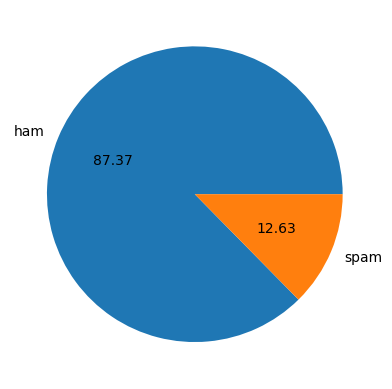

In [71]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

Conclusion: Data is imbalance

In [72]:
import nltk


In [73]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ziegler/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [74]:
df['num_characters'] =  df['text'].apply(len)

In [75]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [76]:
# no of words
df['num_words'] =  df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [77]:
df['num_sentences'] =  df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [78]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [79]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [80]:
#analyse differently for ham

df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [81]:
#analyse differently for spam

df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [82]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

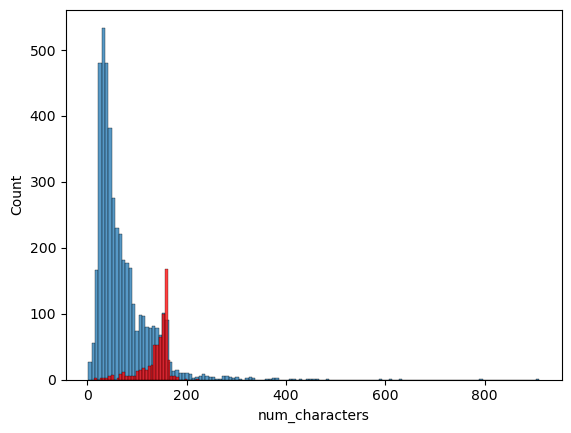

In [83]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

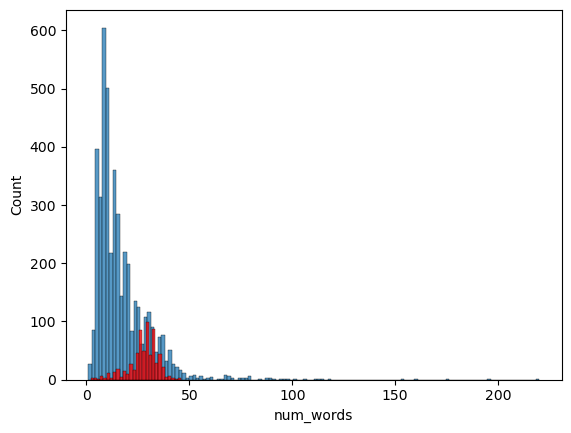

In [84]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

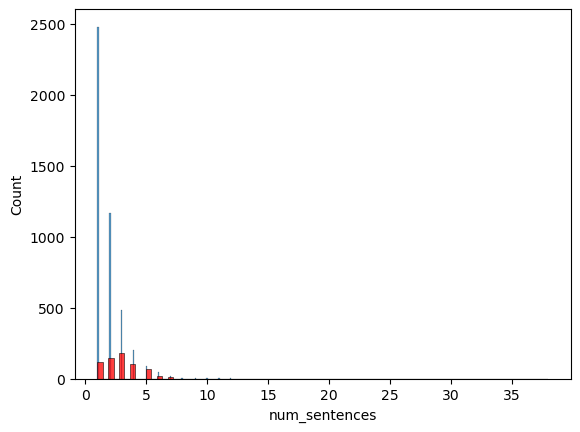

In [85]:
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

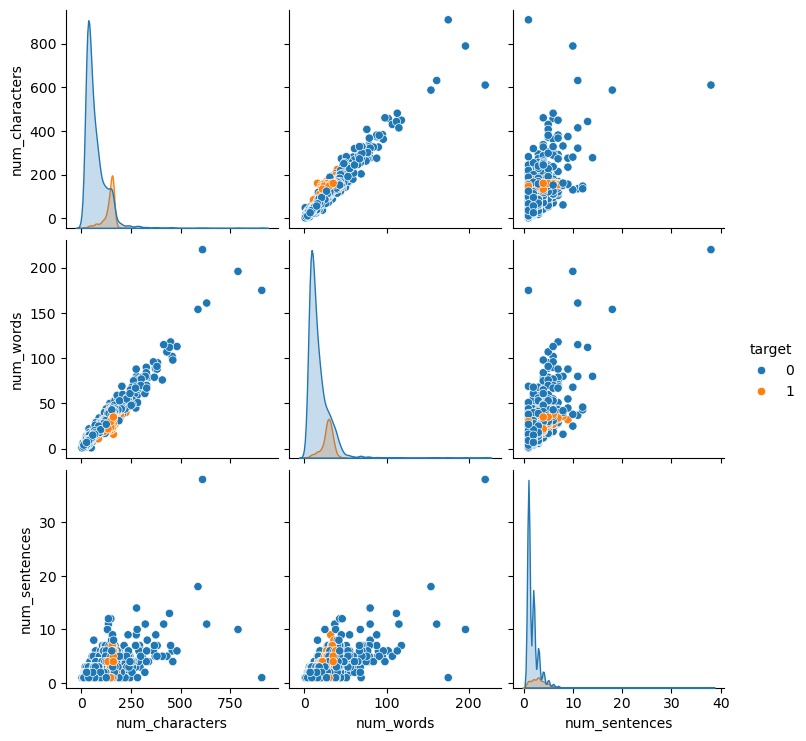

In [86]:
sns.pairplot(df, hue='target')

# Data Preprocessing

Lower case

Tokenization
    
Removing special characters
    
Removing stop words (is, of, the) and punctuation 
    
Stemming (dance dancing dance converted to dance. All mean the same)


In [87]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()

    #tokenize
    text = nltk.word_tokenize(text)

    # remove special char
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # remove stop words
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    # stemming
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [88]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [89]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [90]:
#apply on whole df
df['transformed_text'] = df['text'].apply(transform_text)

In [91]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [92]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [93]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

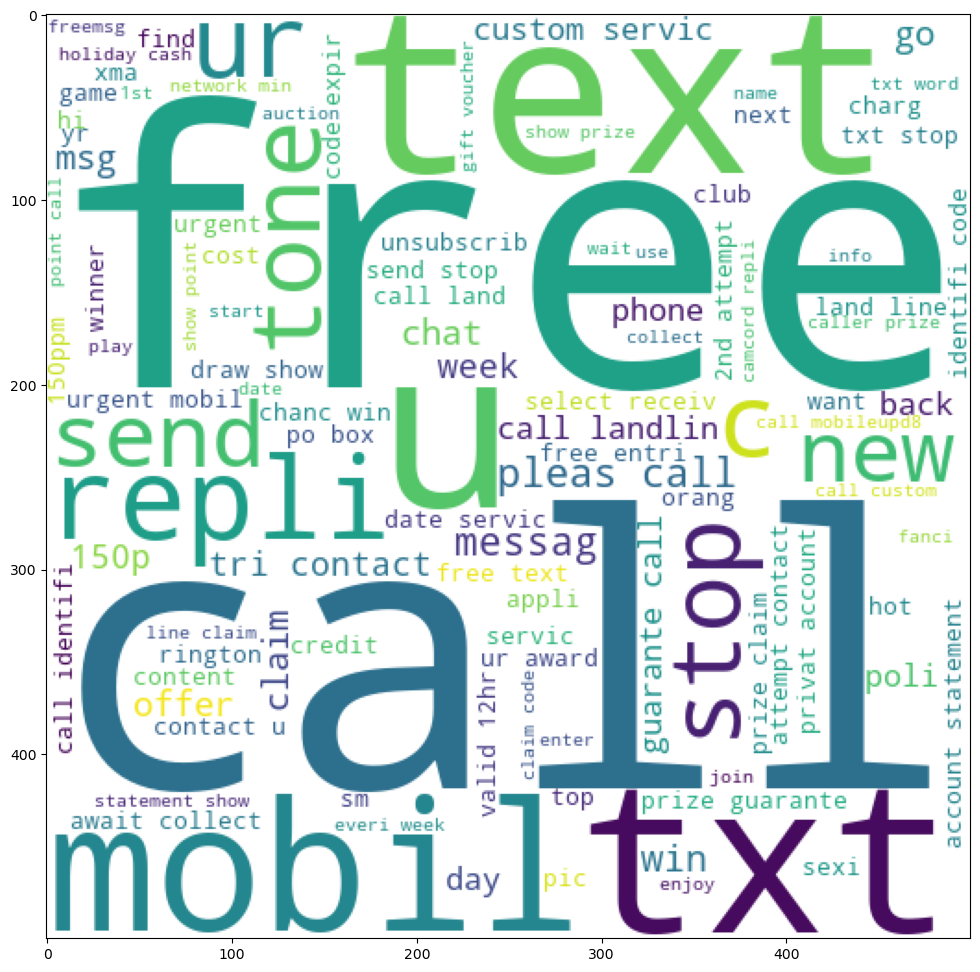

In [94]:
plt.figure(figsize=(12,12))
plt.imshow(spam_wc)

In [95]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

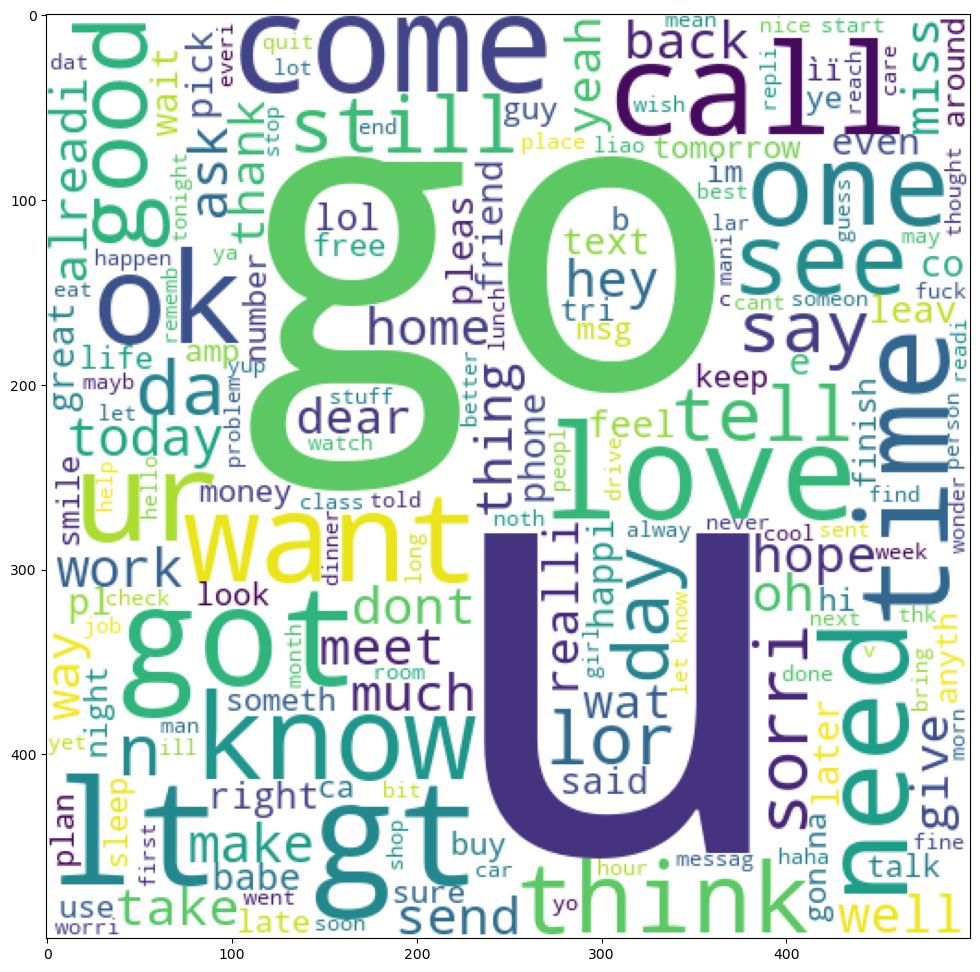

In [96]:
plt.figure(figsize=(12,12))
plt.imshow(ham_wc)

In [97]:
spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [98]:
len(spam_corpus)

9939

In [99]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


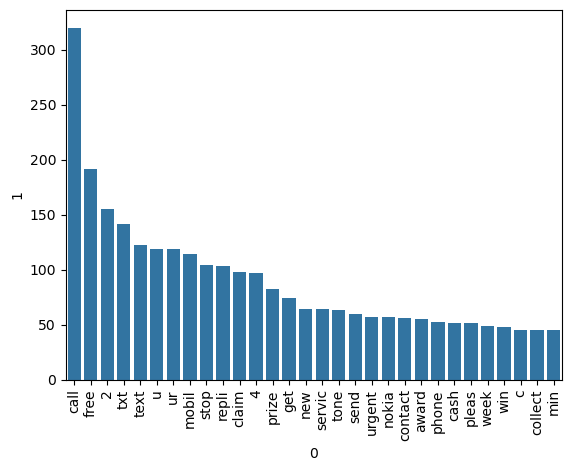

In [100]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y =pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [101]:
# ham corpus
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

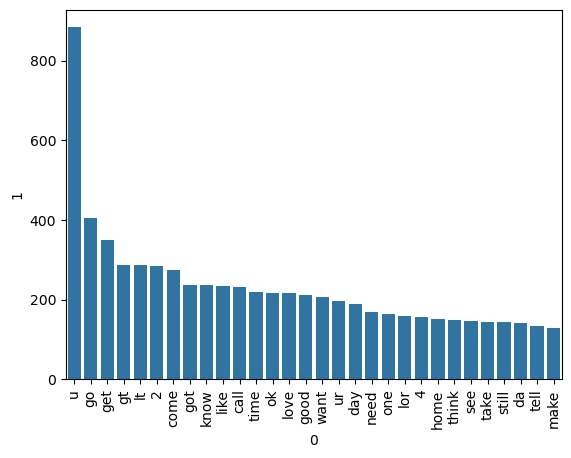

In [102]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y =pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [130]:
# knieve bayes
# convert text to numbers/vectors
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [131]:
#X = cv.fit_transform(df['transformed_text']).toarray()
#Changing to tfidf
X = tfidf.fit_transform(df['transformed_text']).toarray() 

In [132]:
X.shape

(5169, 3000)

In [133]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [136]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [137]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [138]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [139]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [140]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


tfidf -> mnb

### Improve the model

In [ ]:
#tfidf = TfidfVectorizer(max_features=3000)

# Exporting

In [141]:
import pickle 
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))